In [1]:
from RegressionEnvs import RegressionClass as RC
from RNNEnvs import RNNClass as RNN
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.layers import SimpleRNN, LSTM
import pandas as pd

In [2]:
## Suppress warnings due to inconsistencies between various libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
ModelRC = RC()

for m in [LinearRegression,ARIMA]:
    ModelRC.Prediction(m)
    

ModelRNN = RNN()

for m in [SimpleRNN,LSTM]:
    ModelRNN.Prediction(m)

8/8 [==============================] - 0s 5ms/step


In [4]:
for m in [LinearRegression,ARIMA]:
    ModelRC.VisualizationRegression(m,False)

for m in [SimpleRNN,LSTM]:
    ModelRNN.VisualizationRNN(m,False)

Linear Regression: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0062, Test MSE = 0.0018
IBM: Train MSE = 0.0054, Valid MSE = 0.0042, Test MSE = 0.0018
SPY: Train MSE = 0.0037, Valid MSE = 0.0064, Test MSE = 0.0031
ARIMA: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0081, Test MSE = 0.0022
IBM: Train MSE = 0.0054, Valid MSE = 0.0048, Test MSE = 0.0021
SPY: Train MSE = 0.0037, Valid MSE = 0.0096, Test MSE = 0.0047
SimpleRNN: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0031, Valid MSE = 0.0058, Test MSE = 0.0018
IBM: Train MSE = 0.0049, Valid MSE = 0.0041, Test MSE = 0.0019
SPY: Train MSE = 0.0033, Valid MSE = 0.0059, Test MSE = 0.0030
LSTM: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0048, Valid MSE = 0.0061, Test MSE = 0.0017
IBM: Train MSE = 0.0058, Valid MSE = 0.0040, Test MSE = 0.0017
SPY: Train MSE = 0.0044, Valid MSE = 0.0060, Test MSE = 0.0029


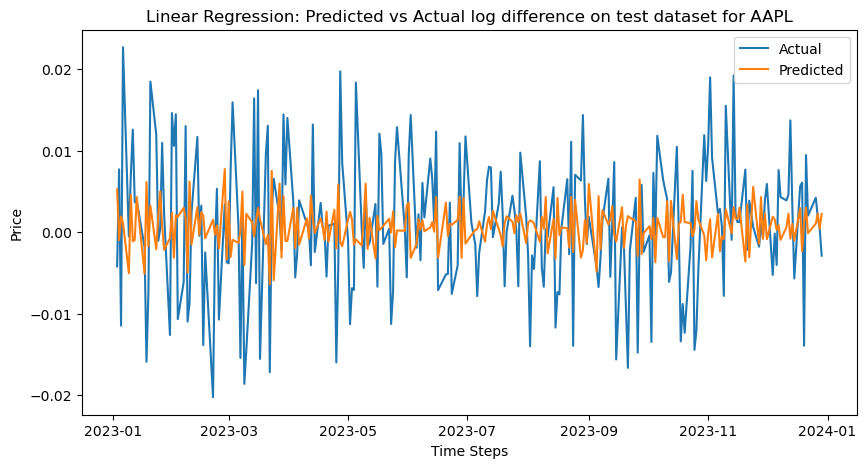

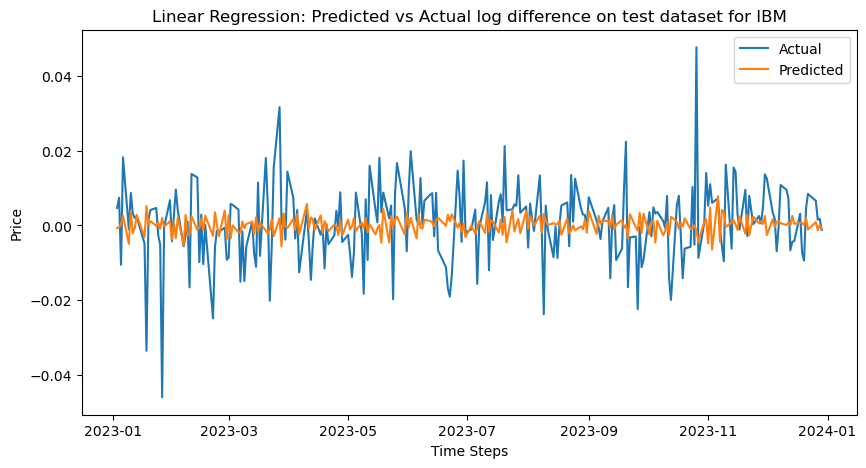

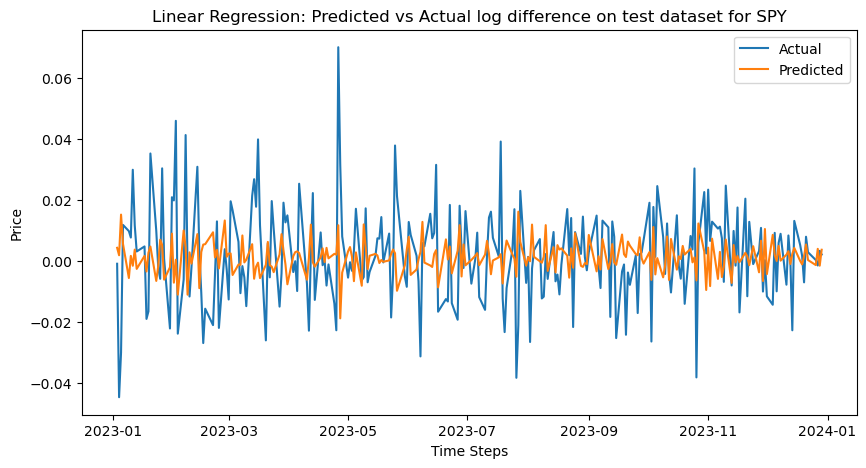

Linear Regression: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0062, Test MSE = 0.0018
IBM: Train MSE = 0.0054, Valid MSE = 0.0042, Test MSE = 0.0018
SPY: Train MSE = 0.0037, Valid MSE = 0.0064, Test MSE = 0.0031


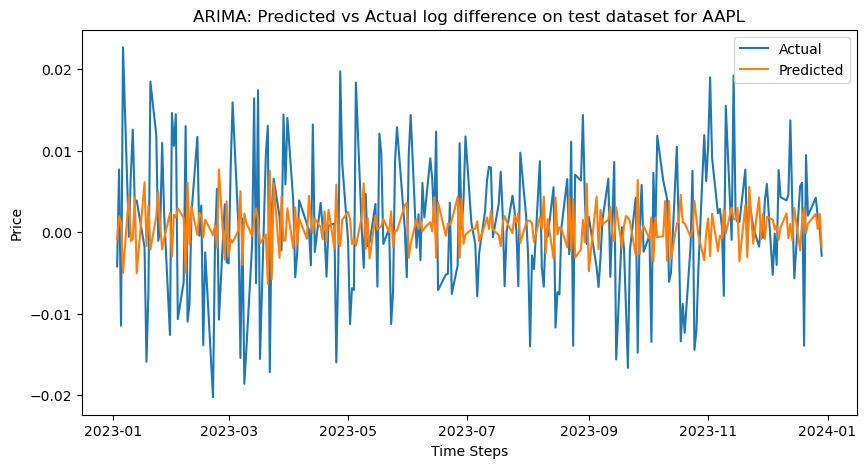

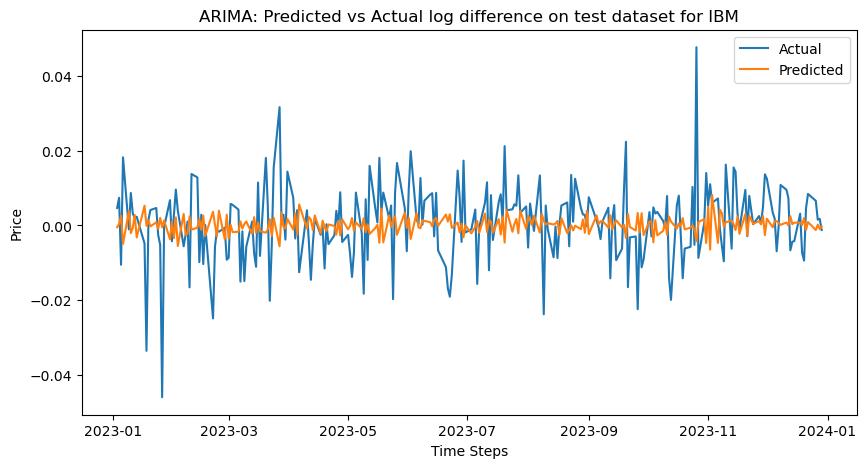

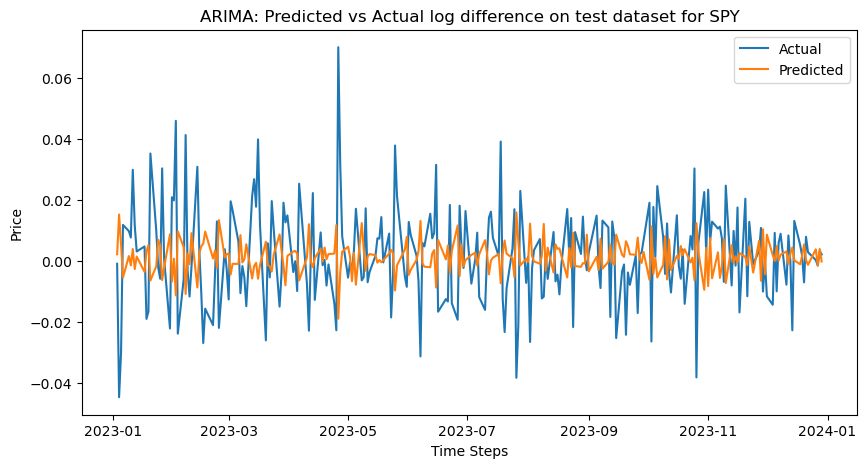

ARIMA: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0040, Valid MSE = 0.0081, Test MSE = 0.0022
IBM: Train MSE = 0.0054, Valid MSE = 0.0048, Test MSE = 0.0021
SPY: Train MSE = 0.0037, Valid MSE = 0.0096, Test MSE = 0.0047


In [5]:
for m in [LinearRegression,ARIMA]:
    ModelRC.Visualization(m,True)

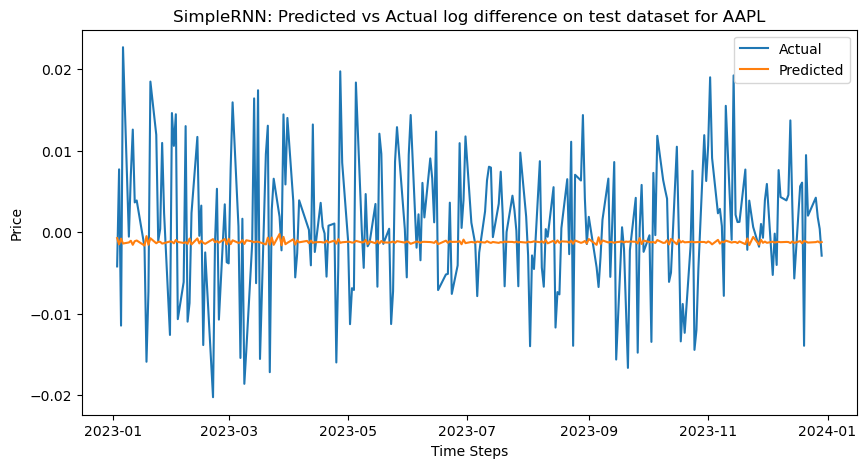

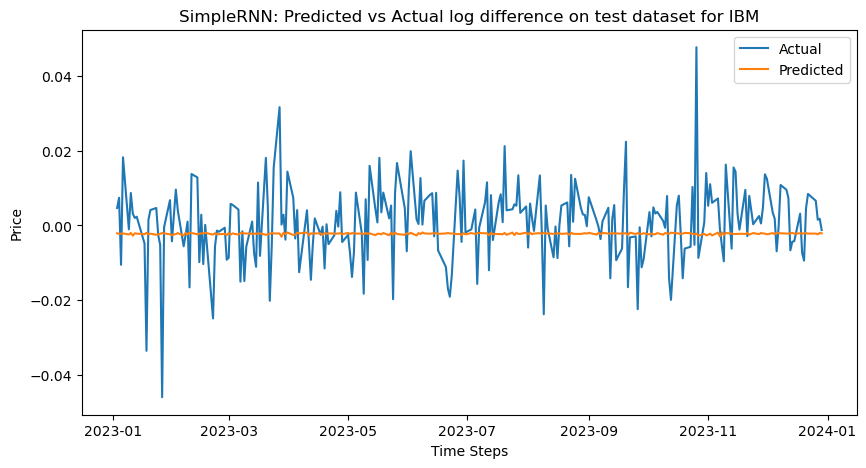

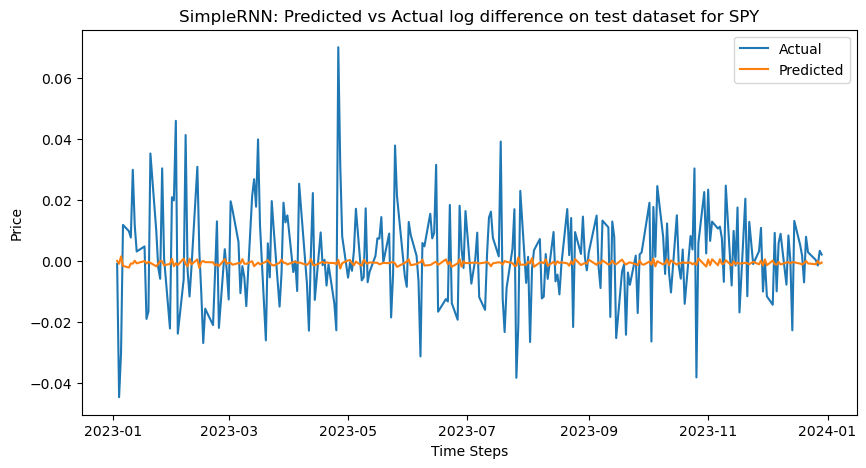

SimpleRNN: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0031, Valid MSE = 0.0058, Test MSE = 0.0018
IBM: Train MSE = 0.0049, Valid MSE = 0.0041, Test MSE = 0.0019
SPY: Train MSE = 0.0033, Valid MSE = 0.0059, Test MSE = 0.0030


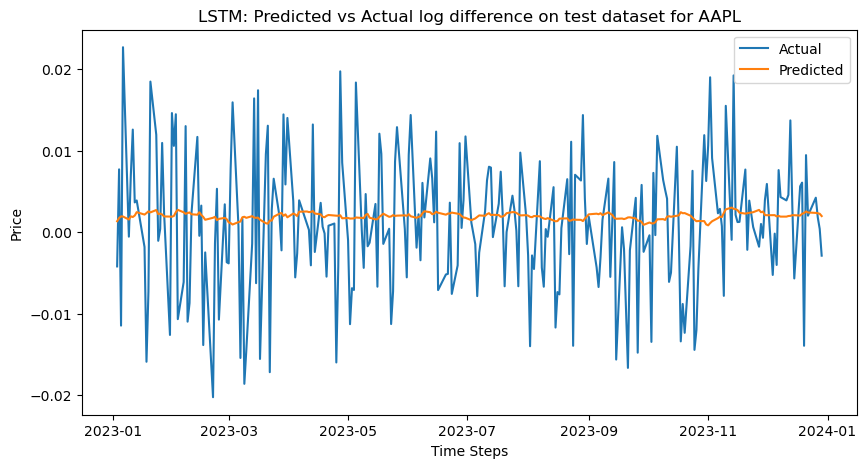

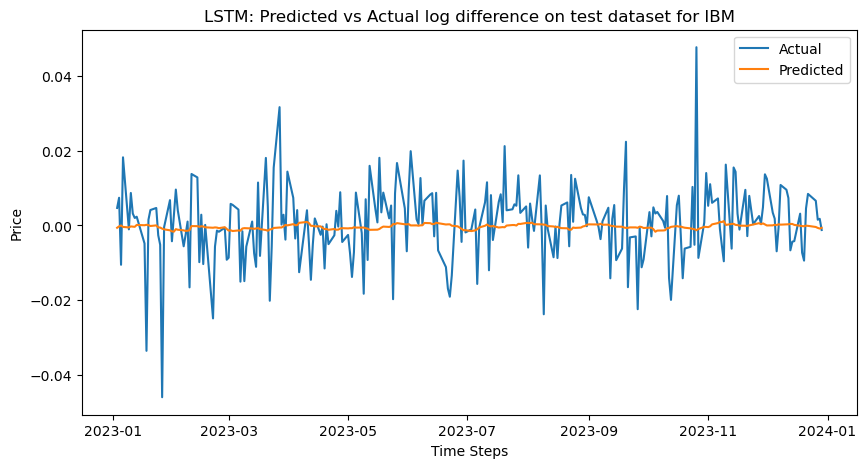

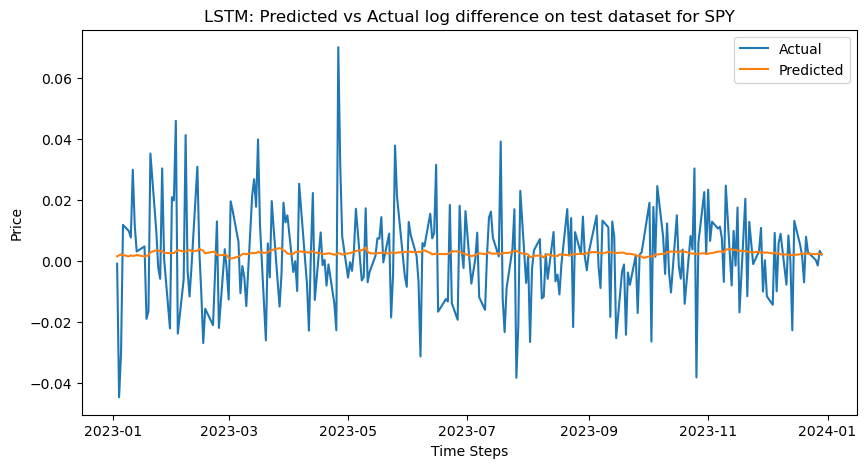

LSTM: mean Squared Error for each ticker:
AAPL: Train MSE = 0.0048, Valid MSE = 0.0061, Test MSE = 0.0017
IBM: Train MSE = 0.0058, Valid MSE = 0.0040, Test MSE = 0.0017
SPY: Train MSE = 0.0044, Valid MSE = 0.0060, Test MSE = 0.0029


In [6]:
for m in [SimpleRNN,LSTM]:
    ModelRNN.Visualization(m,True)



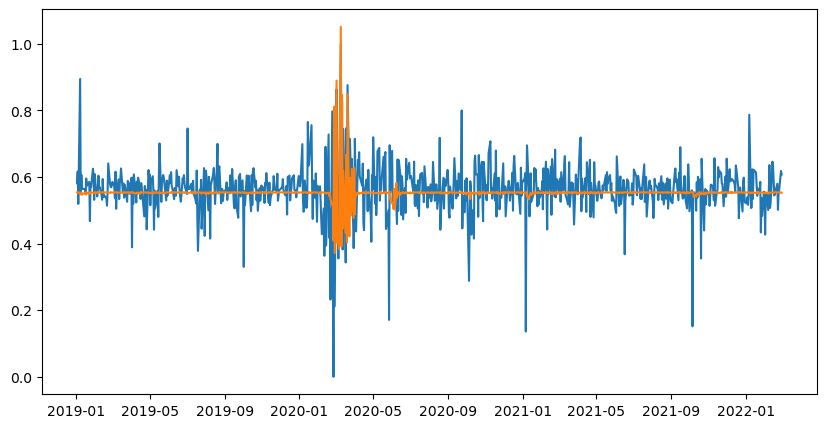

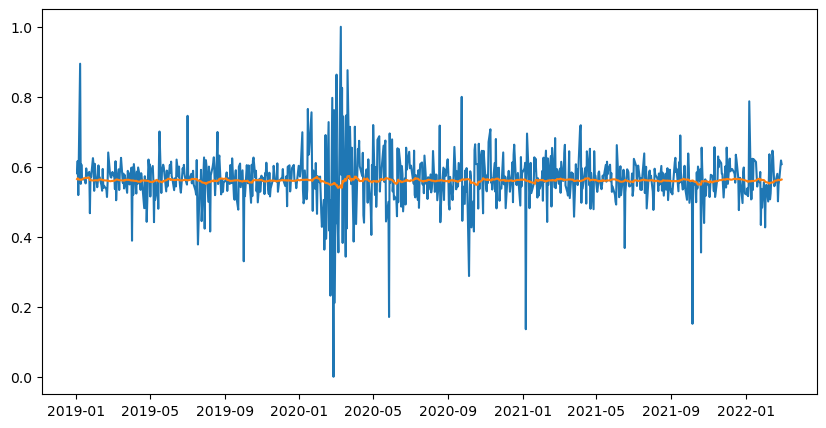

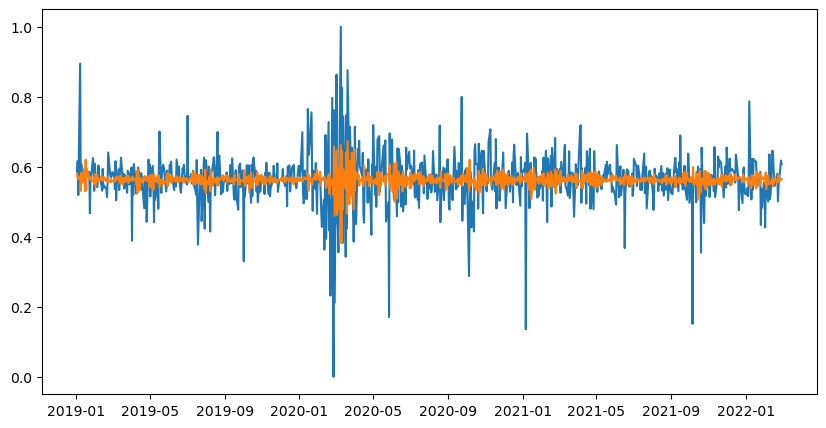

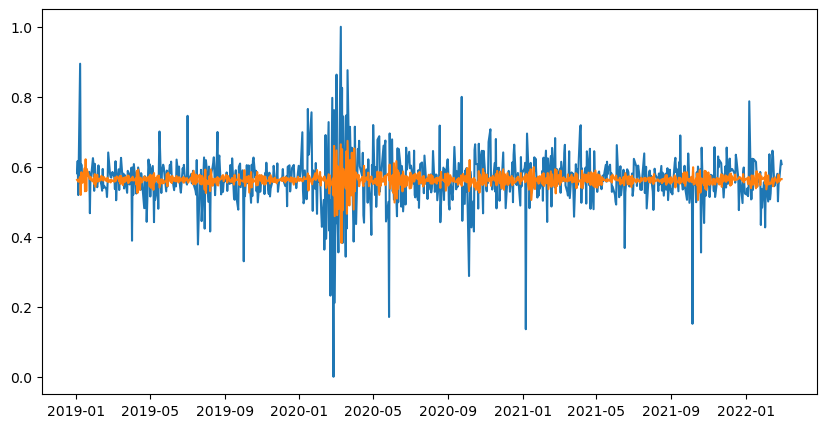

In [7]:
import matplotlib.pyplot as plt
name = 'IBM'
n_train = len(ModelRNN.y_train[name])
for model in [SimpleRNN, LSTM]:
    plt.figure(figsize=(10, 5))

    plt.plot(ModelRNN.dates[:n_train], ModelRNN.y_train[name], label="Actual")
    plt.plot(ModelRNN.dates[:n_train], ModelRNN.train_pred[name][model], label="Predicted")

for model in [LinearRegression, ARIMA]:
    plt.figure(figsize=(10, 5))
    
    plt.plot(ModelRC.dates[:n_train], ModelRC.y_train[name], label="Actual")
    plt.plot(ModelRC.dates[:n_train], ModelRC.train_pred[name][model], label="Predicted")

In [8]:
for name in ['AAPL', 'IBM', 'SPY']:
    for model in [LinearRegression, ARIMA]:
        Signal = [(ModelRC.y_test[name]>0)[i]*(ModelRC.test_pred[name][model]>0)[i] for i in range(250)]
        print(name, ModelRC.models_name_str[model],sum(Signal)/250)
    for model in [SimpleRNN,LSTM]:
        Signal = [(ModelRNN.y_test[name]>0)[i]*(ModelRNN.test_pred[name][model]>0)[i] for i in range(250)]
        print(name, ModelRNN.models_name_str[model],sum(Signal)/250)

AAPL Linear Regression [0.604]
AAPL ARIMA [0.6]
AAPL SimpleRNN [0.]
AAPL LSTM [1.]
IBM Linear Regression [0.54]
IBM ARIMA [0.548]
IBM SimpleRNN [0.]
IBM LSTM [0.316]
SPY Linear Regression [0.604]
SPY ARIMA [0.604]
SPY SimpleRNN [0.152]
SPY LSTM [1.]


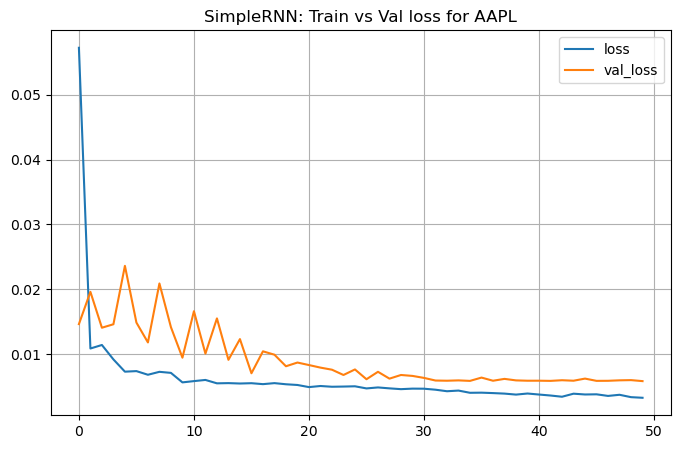

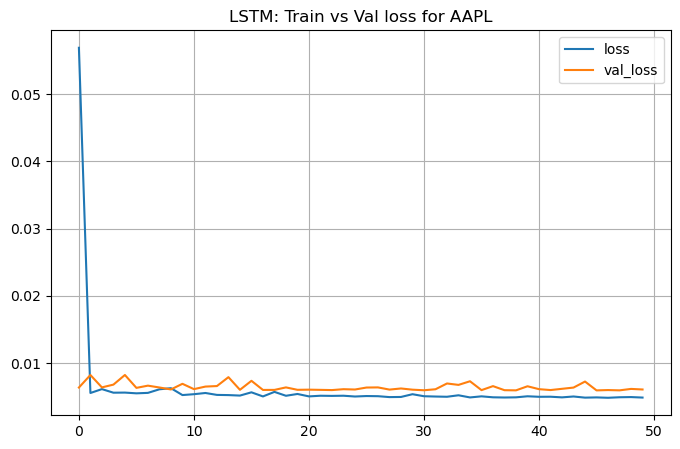

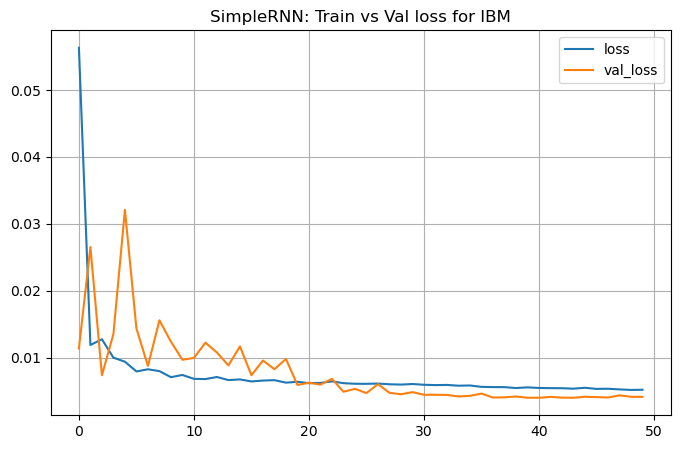

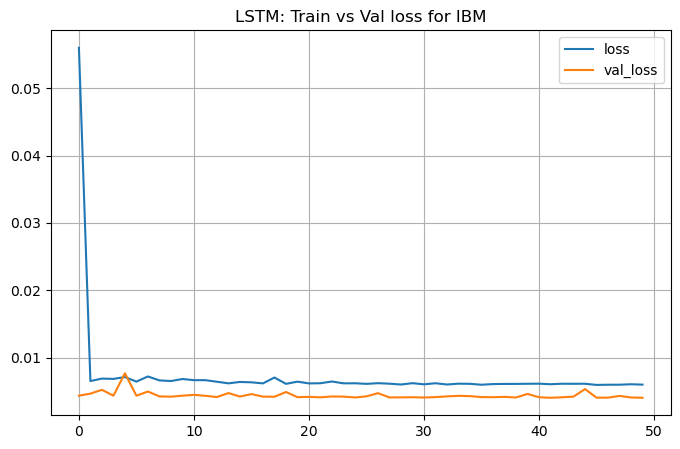

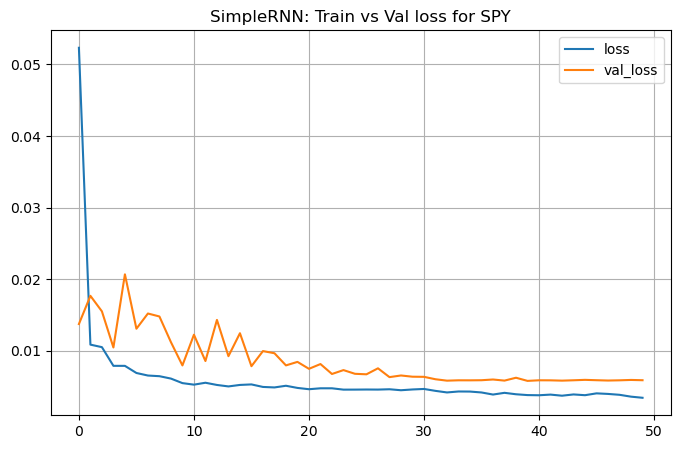

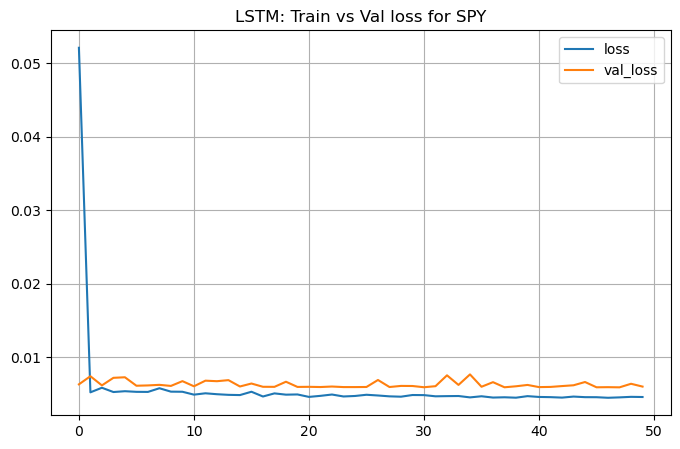

In [9]:
import pandas as pd

for name in ['AAPL', 'IBM', 'SPY']:
    for model in [SimpleRNN,LSTM]:
        pd.DataFrame(ModelRNN.history[name][model].history).plot(figsize=(8, 5))
        plt.grid(True)
        plt.title(f'{ModelRNN.models_name_str[model]}: Train vs Val loss for {name}')
        plt.show()